In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import csv
import pickle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataSet = 'nba_logreg'
filePath = '/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/'+dataSet+'.csv'
data = pd.read_csv(filePath)
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
data = data.replace(np.nan,0.0)


In [6]:
data.shape

(1340, 21)

In [7]:
data.iloc[3,19]

1.0

In [8]:
data = data.drop(['Name'], axis=1)

In [9]:
from random import shuffle
train, test= train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
print(train.shape,test.shape)

(1072, 20) (268, 20)


In [10]:
train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1148,58,12.8,4.0,1.6,3.6,44.9,0.0,0.0,0.0,0.8,1.3,59.7,1.1,1.8,2.9,0.3,0.2,1.4,0.7,0.0
807,38,8.5,3.2,1.3,3.3,40.8,0.0,0.0,0.0,0.5,0.7,64.3,0.6,1.1,1.6,0.3,0.2,0.4,0.5,0.0
1287,67,16.7,5.0,2.0,4.2,48.4,0.0,0.3,9.1,0.9,1.5,61.4,0.9,1.8,2.7,0.8,1.0,0.3,0.8,1.0
590,82,28.0,8.8,3.4,7.8,42.8,0.9,2.4,35.0,1.2,1.5,80.6,1.3,2.7,4.0,0.9,0.7,0.5,1.2,1.0
1188,35,5.5,1.8,0.7,1.9,38.2,0.1,0.4,28.6,0.2,0.4,57.1,0.2,0.4,0.7,0.4,0.2,0.3,0.5,1.0


In [11]:
features=train.columns[0:-1]
Score=[]
features

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [12]:
X = data[features]
y = data['TARGET_5Yrs']
X.shape

(1340, 19)

# **Data Split (Major and Minor)**

In [13]:
for(TARGET_5Yrs), group in train.groupby(['TARGET_5Yrs']):
  group.to_csv(f'{TARGET_5Yrs}.csv', index=False)
# print(pd.read_csv("0.0.csv"))
# print(pd.read_csv("1.0.csv"))
train_zero = pd.read_csv("0.0.csv")
train_one = pd.read_csv("1.0.csv")
train_zero

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,58,12.8,4.0,1.6,3.6,44.9,0.0,0.0,0.0,0.8,1.3,59.7,1.1,1.8,2.9,0.3,0.2,1.4,0.7,0.0
1,38,8.5,3.2,1.3,3.3,40.8,0.0,0.0,0.0,0.5,0.7,64.3,0.6,1.1,1.6,0.3,0.2,0.4,0.5,0.0
2,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,0.2,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8,0.0
3,39,11.3,4.1,1.7,3.9,43.1,0.1,0.3,25.0,0.7,1.0,68.4,0.5,0.8,1.4,0.2,0.2,0.5,0.5,0.0
4,82,17.3,6.0,2.1,4.9,42.6,0.0,0.0,0.0,1.8,2.4,73.0,1.4,2.9,4.3,1.1,0.5,0.5,1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,75,18.8,6.3,2.3,4.3,53.3,0.0,0.0,0.0,1.7,2.3,74.1,1.9,3.5,5.4,1.4,0.6,0.9,1.1,0.0
406,70,9.5,2.2,0.8,1.7,44.6,0.0,0.0,0.0,0.6,0.9,73.8,0.8,1.6,2.4,0.2,0.2,0.5,0.6,0.0
407,53,12.3,1.5,0.5,1.6,32.6,0.0,0.0,0.0,0.4,0.7,56.4,1.0,2.1,3.1,0.4,0.2,0.8,0.8,0.0
408,45,10.4,3.7,1.7,4.1,40.8,0.1,0.3,20.0,0.3,0.4,60.0,0.1,0.9,1.0,1.8,0.4,0.1,1.1,0.0


In [14]:
train_one

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,67,16.7,5.0,2.0,4.2,48.4,0.0,0.3,9.1,0.9,1.5,61.4,0.9,1.8,2.7,0.8,1.0,0.3,0.8,1.0
1,82,28.0,8.8,3.4,7.8,42.8,0.9,2.4,35.0,1.2,1.5,80.6,1.3,2.7,4.0,0.9,0.7,0.5,1.2,1.0
2,35,5.5,1.8,0.7,1.9,38.2,0.1,0.4,28.6,0.2,0.4,57.1,0.2,0.4,0.7,0.4,0.2,0.3,0.5,1.0
3,78,13.3,3.6,1.6,3.1,51.7,0.0,0.0,0.0,0.4,0.7,60.8,0.8,2.1,2.9,0.8,0.3,1.1,0.8,1.0
4,36,7.0,1.6,0.7,1.6,43.1,0.0,0.0,0.0,0.3,0.4,69.2,0.7,1.2,1.9,0.2,0.1,0.1,0.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,49,29.7,9.9,3.5,8.3,42.5,1.1,3.0,35.8,1.8,2.2,81.8,0.4,1.8,2.3,2.5,0.9,0.5,1.6,1.0
658,77,29.4,7.5,2.9,7.9,37.1,0.5,1.7,32.8,1.0,1.4,72.7,0.7,1.6,2.2,4.3,0.8,0.1,1.6,1.0
659,70,12.7,4.8,1.7,4.4,40.0,0.0,0.4,8.0,1.3,1.6,83.6,0.3,0.9,1.2,0.9,0.9,0.1,0.9,1.0
660,78,22.6,7.5,2.8,6.1,46.2,0.4,1.2,32.3,1.5,1.9,77.7,1.7,3.2,4.9,1.2,0.7,0.8,1.0,1.0


In [15]:
train_zero.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/train_zero.csv')
train_one.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/train_one.csv')


In [16]:
major_class = train_one
minor_class = train_zero

In [17]:
# before scaling the min and max values for both alcohol and malic acid are different 

minor_class.describe()  


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,51.582927,14.338293,5.103902,1.965122,4.575854,42.412439,0.227073,0.747561,19.408049,0.949756,1.354390,68.877317,0.724878,1.550976,2.274146,1.241220,0.499268,0.257317,0.956341,0.0
std,17.046727,6.739068,3.222701,1.240841,2.673867,6.899354,0.312140,0.908561,15.332440,0.717686,0.959749,11.651404,0.572316,1.058860,1.542365,1.143787,0.327657,0.296776,0.571166,0.0
min,11.000000,3.100000,0.700000,0.300000,0.900000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.0
25%,39.000000,9.325000,3.025000,1.200000,2.800000,38.000000,0.000000,0.100000,0.000000,0.500000,0.700000,63.050000,0.300000,0.800000,1.200000,0.500000,0.300000,0.100000,0.525000,0.0
50%,51.000000,12.800000,4.100000,1.600000,3.900000,41.700000,0.100000,0.300000,23.300000,0.800000,1.100000,69.900000,0.600000,1.200000,1.800000,0.900000,0.400000,0.200000,0.800000,0.0
75%,64.000000,17.800000,6.275000,2.500000,5.600000,46.275000,0.400000,1.200000,31.375000,1.100000,1.700000,76.400000,1.000000,2.000000,2.900000,1.600000,0.600000,0.300000,1.200000,0.0
max,82.000000,37.200000,21.900000,8.000000,17.600000,65.900000,1.600000,4.800000,100.000000,5.000000,6.200000,100.000000,3.900000,7.700000,11.000000,8.700000,2.100000,2.100000,3.900000,0.0


In [18]:
major_class.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,662.000000,662.000000,662.000000,662.00000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.00000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.0
mean,65.480363,19.496224,7.783837,3.01148,6.635801,45.212991,0.256344,0.784894,19.278852,1.507100,2.099245,71.308308,1.16284,2.275982,3.440483,1.760121,0.689879,0.433082,1.336556,1.0
std,15.598268,8.476121,4.605860,1.78220,3.838715,5.486204,0.416324,1.116503,16.515300,1.052291,1.422453,9.806031,0.82058,1.415565,2.155398,1.617738,0.440571,0.480081,0.766799,0.0
min,16.000000,4.400000,1.000000,0.40000,0.800000,30.100000,0.000000,0.000000,0.000000,0.100000,0.100000,28.600000,0.10000,0.300000,0.400000,0.000000,0.000000,0.000000,0.100000,1.0
25%,54.000000,12.625000,4.500000,1.72500,3.800000,41.600000,0.000000,0.000000,0.000000,0.800000,1.100000,66.025000,0.50000,1.200000,1.900000,0.700000,0.400000,0.100000,0.800000,1.0
50%,70.000000,18.400000,6.600000,2.50000,5.500000,45.200000,0.100000,0.300000,22.050000,1.200000,1.700000,71.700000,1.00000,2.000000,3.000000,1.200000,0.600000,0.300000,1.200000,1.0
75%,79.000000,25.575000,10.000000,3.90000,8.400000,48.400000,0.375000,1.100000,32.900000,1.900000,2.700000,77.775000,1.60000,2.900000,4.500000,2.300000,0.900000,0.600000,1.700000,1.0
max,82.000000,40.100000,24.300000,9.80000,19.800000,73.700000,2.300000,6.100000,100.000000,7.500000,10.200000,100.000000,4.30000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.0


# **Auto Encoder**

In [20]:
import keras
from keras import layers

# This is the size of our encoded representations
n = len(data.iloc[0]) - 1
encoding_dim = n

# This is our input image
input_img = keras.Input(shape=(n,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=None)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(n, activation=None)(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [21]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


In [22]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [23]:
autoencoder.compile(optimizer='adam', loss='mse')

In [24]:
x_train = minor_class[features]
x_test = major_class[features]
y_train = minor_class['TARGET_5Yrs']
y_test = major_class['TARGET_5Yrs']

# **Data Scaling**

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # create an object of class

scaler.fit(x_train)       #  fit on training i/p data
x_train_scaled = scaler.transform(x_train)    # transform model on both traing and testing data

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)


In [26]:
# convert the numpy array after transform into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
#x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)


In [27]:
x_train.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/x_train.csv')
x_test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/x_test.csv')
x_train_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/x_train_scaled.csv')
x_test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/x_test_scaled.csv')


In [28]:
x_train.shape

(410, 19)

In [29]:
x_test.shape

(662, 19)

In [30]:
x_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,58,12.8,4.0,1.6,3.6,44.9,0.0,0.0,0.0,0.8,1.3,59.7,1.1,1.8,2.9,0.3,0.2,1.4,0.7
1,38,8.5,3.2,1.3,3.3,40.8,0.0,0.0,0.0,0.5,0.7,64.3,0.6,1.1,1.6,0.3,0.2,0.4,0.5
2,34,8.6,3.5,1.4,3.7,39.2,0.4,1.4,31.9,0.2,0.3,54.5,0.4,0.4,0.8,0.6,0.3,0.2,0.8
3,39,11.3,4.1,1.7,3.9,43.1,0.1,0.3,25.0,0.7,1.0,68.4,0.5,0.8,1.4,0.2,0.2,0.5,0.5
4,82,17.3,6.0,2.1,4.9,42.6,0.0,0.0,0.0,1.8,2.4,73.0,1.4,2.9,4.3,1.1,0.5,0.5,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,75,18.8,6.3,2.3,4.3,53.3,0.0,0.0,0.0,1.7,2.3,74.1,1.9,3.5,5.4,1.4,0.6,0.9,1.1
406,70,9.5,2.2,0.8,1.7,44.6,0.0,0.0,0.0,0.6,0.9,73.8,0.8,1.6,2.4,0.2,0.2,0.5,0.6
407,53,12.3,1.5,0.5,1.6,32.6,0.0,0.0,0.0,0.4,0.7,56.4,1.0,2.1,3.1,0.4,0.2,0.8,0.8
408,45,10.4,3.7,1.7,4.1,40.8,0.1,0.3,20.0,0.3,0.4,60.0,0.1,0.9,1.0,1.8,0.4,0.1,1.1


In [31]:
x_test

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,67,16.7,5.0,2.0,4.2,48.4,0.0,0.3,9.1,0.9,1.5,61.4,0.9,1.8,2.7,0.8,1.0,0.3,0.8
1,82,28.0,8.8,3.4,7.8,42.8,0.9,2.4,35.0,1.2,1.5,80.6,1.3,2.7,4.0,0.9,0.7,0.5,1.2
2,35,5.5,1.8,0.7,1.9,38.2,0.1,0.4,28.6,0.2,0.4,57.1,0.2,0.4,0.7,0.4,0.2,0.3,0.5
3,78,13.3,3.6,1.6,3.1,51.7,0.0,0.0,0.0,0.4,0.7,60.8,0.8,2.1,2.9,0.8,0.3,1.1,0.8
4,36,7.0,1.6,0.7,1.6,43.1,0.0,0.0,0.0,0.3,0.4,69.2,0.7,1.2,1.9,0.2,0.1,0.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,49,29.7,9.9,3.5,8.3,42.5,1.1,3.0,35.8,1.8,2.2,81.8,0.4,1.8,2.3,2.5,0.9,0.5,1.6
658,77,29.4,7.5,2.9,7.9,37.1,0.5,1.7,32.8,1.0,1.4,72.7,0.7,1.6,2.2,4.3,0.8,0.1,1.6
659,70,12.7,4.8,1.7,4.4,40.0,0.0,0.4,8.0,1.3,1.6,83.6,0.3,0.9,1.2,0.9,0.9,0.1,0.9
660,78,22.6,7.5,2.8,6.1,46.2,0.4,1.2,32.3,1.5,1.9,77.7,1.7,3.2,4.9,1.2,0.7,0.8,1.0


In [32]:
x_train_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.661972,0.284457,0.155660,0.168831,0.161677,0.501188,0.0000,0.000000,0.000,0.16,0.209677,0.597,0.282051,0.213333,0.242991,0.034483,0.095238,0.666667,0.157895
1,0.380282,0.158358,0.117925,0.129870,0.143713,0.403800,0.0000,0.000000,0.000,0.10,0.112903,0.643,0.153846,0.120000,0.121495,0.034483,0.095238,0.190476,0.105263
2,0.323944,0.161290,0.132075,0.142857,0.167665,0.365796,0.2500,0.291667,0.319,0.04,0.048387,0.545,0.102564,0.026667,0.046729,0.068966,0.142857,0.095238,0.184211
3,0.394366,0.240469,0.160377,0.181818,0.179641,0.458432,0.0625,0.062500,0.250,0.14,0.161290,0.684,0.128205,0.080000,0.102804,0.022989,0.095238,0.238095,0.105263
4,1.000000,0.416422,0.250000,0.233766,0.239521,0.446556,0.0000,0.000000,0.000,0.36,0.387097,0.730,0.358974,0.360000,0.373832,0.126437,0.238095,0.238095,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.901408,0.460411,0.264151,0.259740,0.203593,0.700713,0.0000,0.000000,0.000,0.34,0.370968,0.741,0.487179,0.440000,0.476636,0.160920,0.285714,0.428571,0.263158
406,0.830986,0.187683,0.070755,0.064935,0.047904,0.494062,0.0000,0.000000,0.000,0.12,0.145161,0.738,0.205128,0.186667,0.196262,0.022989,0.095238,0.238095,0.131579
407,0.591549,0.269795,0.037736,0.025974,0.041916,0.209026,0.0000,0.000000,0.000,0.08,0.112903,0.564,0.256410,0.253333,0.261682,0.045977,0.095238,0.380952,0.184211
408,0.478873,0.214076,0.141509,0.181818,0.191617,0.403800,0.0625,0.062500,0.200,0.06,0.064516,0.600,0.025641,0.093333,0.065421,0.206897,0.190476,0.047619,0.263158


In [33]:
x_test_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.772727,0.344538,0.171674,0.170213,0.178947,0.419725,0.000000,0.049180,0.091,0.108108,0.138614,0.459384,0.190476,0.161290,0.170370,0.075472,0.40,0.076923,0.162791
1,1.000000,0.661064,0.334764,0.319149,0.368421,0.291284,0.391304,0.393443,0.350,0.148649,0.138614,0.728291,0.285714,0.258065,0.266667,0.084906,0.28,0.128205,0.255814
2,0.287879,0.030812,0.034335,0.031915,0.057895,0.185780,0.043478,0.065574,0.286,0.013514,0.029703,0.399160,0.023810,0.010753,0.022222,0.037736,0.08,0.076923,0.093023
3,0.939394,0.249300,0.111588,0.127660,0.121053,0.495413,0.000000,0.000000,0.000,0.040541,0.059406,0.450980,0.166667,0.193548,0.185185,0.075472,0.12,0.282051,0.162791
4,0.303030,0.072829,0.025751,0.031915,0.042105,0.298165,0.000000,0.000000,0.000,0.027027,0.029703,0.568627,0.142857,0.096774,0.111111,0.018868,0.04,0.025641,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.500000,0.708683,0.381974,0.329787,0.394737,0.284404,0.478261,0.491803,0.358,0.229730,0.207921,0.745098,0.071429,0.161290,0.140741,0.235849,0.36,0.128205,0.348837
658,0.924242,0.700280,0.278970,0.265957,0.373684,0.160550,0.217391,0.278689,0.328,0.121622,0.128713,0.617647,0.142857,0.139785,0.133333,0.405660,0.32,0.025641,0.348837
659,0.818182,0.232493,0.163090,0.138298,0.189474,0.227064,0.000000,0.065574,0.080,0.162162,0.148515,0.770308,0.047619,0.064516,0.059259,0.084906,0.36,0.025641,0.186047
660,0.939394,0.509804,0.278970,0.255319,0.278947,0.369266,0.173913,0.196721,0.323,0.189189,0.178218,0.687675,0.380952,0.311828,0.333333,0.113208,0.28,0.205128,0.209302


In [35]:
autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_train_scaled, x_train_scaled))

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 10/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 11/50
13/13 [

In [36]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_scaled)
#decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

21/21 [==============================] - 0s 1ms/step


array([[ 0.07317536, -0.3123899 ,  0.03649687, ...,  0.17436552,
         0.8050809 ,  0.59243274],
       [ 0.2079061 , -0.3362571 ,  0.03166227, ...,  0.56330705,
         1.2674592 ,  1.0657003 ],
       [-0.0742543 , -0.05058267,  0.08932133, ...,  0.01039708,
         0.30870593,  0.2934872 ],
       ...,
       [-0.07584482, -0.46796858,  0.0936586 , ...,  0.3458435 ,
         0.798552  ,  0.6663958 ],
       [ 0.22142684, -0.33096904,  0.09142379, ...,  0.37138164,
         1.1920555 ,  0.9110809 ],
       [ 0.11721236, -0.5376897 , -0.10342266, ...,  0.48728794,
         1.1573231 ,  0.9443126 ]], dtype=float32)

# **Euclidean Distance**

In [37]:
x_test_scaled_euclidean = x_test_scaled
x_test_scaled_euclidean.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.772727,0.344538,0.171674,0.170213,0.178947,0.419725,0.000000,0.049180,0.091,0.108108,0.138614,0.459384,0.190476,0.161290,0.170370,0.075472,0.40,0.076923,0.162791
1,1.000000,0.661064,0.334764,0.319149,0.368421,0.291284,0.391304,0.393443,0.350,0.148649,0.138614,0.728291,0.285714,0.258065,0.266667,0.084906,0.28,0.128205,0.255814
2,0.287879,0.030812,0.034335,0.031915,0.057895,0.185780,0.043478,0.065574,0.286,0.013514,0.029703,0.399160,0.023810,0.010753,0.022222,0.037736,0.08,0.076923,0.093023
3,0.939394,0.249300,0.111588,0.127660,0.121053,0.495413,0.000000,0.000000,0.000,0.040541,0.059406,0.450980,0.166667,0.193548,0.185185,0.075472,0.12,0.282051,0.162791
4,0.303030,0.072829,0.025751,0.031915,0.042105,0.298165,0.000000,0.000000,0.000,0.027027,0.029703,0.568627,0.142857,0.096774,0.111111,0.018868,0.04,0.025641,0.046512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.500000,0.708683,0.381974,0.329787,0.394737,0.284404,0.478261,0.491803,0.358,0.229730,0.207921,0.745098,0.071429,0.161290,0.140741,0.235849,0.36,0.128205,0.348837
658,0.924242,0.700280,0.278970,0.265957,0.373684,0.160550,0.217391,0.278689,0.328,0.121622,0.128713,0.617647,0.142857,0.139785,0.133333,0.405660,0.32,0.025641,0.348837
659,0.818182,0.232493,0.163090,0.138298,0.189474,0.227064,0.000000,0.065574,0.080,0.162162,0.148515,0.770308,0.047619,0.064516,0.059259,0.084906,0.36,0.025641,0.186047
660,0.939394,0.509804,0.278970,0.255319,0.278947,0.369266,0.173913,0.196721,0.323,0.189189,0.178218,0.687675,0.380952,0.311828,0.333333,0.113208,0.28,0.205128,0.209302


In [38]:
new_col = []
#print(len(x_test_scaled.iloc[0]))
for i in range(len(x_test_scaled)):
  tot = 0
  for j in range(len(x_test_scaled.iloc[i])):
    a = (x_test_scaled.iloc[i,j] - encoded_imgs[i][j])*(x_test_scaled.iloc[i,j] - encoded_imgs[i][j])
    tot = tot + a
  new_col.append(tot)
#print(len(new_col))
new_col

[3.40261050782033,
 7.2020244066578165,
 0.8939503919796908,
 3.314843692348025,
 1.3421292033888406,
 4.8731001271154595,
 7.7588952884928695,
 5.252026585605332,
 2.787564331699566,
 2.310671764939614,
 3.2011446399240797,
 5.432427248676378,
 2.1688143121819254,
 4.69634248119862,
 5.910671764710362,
 2.7337614781288218,
 5.724665568268038,
 16.565520647298722,
 5.757072410133218,
 0.9918637083691568,
 13.870111382558752,
 4.226435076463909,
 7.84653310382323,
 8.051670966806846,
 5.273197343474571,
 2.811291006121243,
 8.534468483076372,
 3.270955956473373,
 2.840353009615238,
 8.455681902230356,
 6.364993104877629,
 6.382989423192521,
 6.153896257044849,
 4.042283624724769,
 6.780621486790607,
 2.7867732954998092,
 5.040322855744857,
 2.3634483141194216,
 5.88232376867221,
 4.361904333841376,
 2.914900523387425,
 9.290480090260383,
 8.181341098377946,
 4.443416361630202,
 2.4299913885546442,
 3.626722641724793,
 4.958736165772555,
 2.1470062270769636,
 1.0497864418420504,
 9.17768

In [40]:
x_test_scaled_euclidean['euclidean_distance'] = new_col
#x_test_scaled_euclidean = x_test_scaled_euclidean.drop(['Unnamed: 0'], axis=1)
x_test_scaled_euclidean.to_csv('x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,euclidean_distance
0,0.772727,0.344538,0.171674,0.170213,0.178947,0.419725,0.000000,0.049180,0.091,0.108108,0.138614,0.459384,0.190476,0.161290,0.170370,0.075472,0.40,0.076923,0.162791,3.402611
1,1.000000,0.661064,0.334764,0.319149,0.368421,0.291284,0.391304,0.393443,0.350,0.148649,0.138614,0.728291,0.285714,0.258065,0.266667,0.084906,0.28,0.128205,0.255814,7.202024
2,0.287879,0.030812,0.034335,0.031915,0.057895,0.185780,0.043478,0.065574,0.286,0.013514,0.029703,0.399160,0.023810,0.010753,0.022222,0.037736,0.08,0.076923,0.093023,0.893950
3,0.939394,0.249300,0.111588,0.127660,0.121053,0.495413,0.000000,0.000000,0.000,0.040541,0.059406,0.450980,0.166667,0.193548,0.185185,0.075472,0.12,0.282051,0.162791,3.314844
4,0.303030,0.072829,0.025751,0.031915,0.042105,0.298165,0.000000,0.000000,0.000,0.027027,0.029703,0.568627,0.142857,0.096774,0.111111,0.018868,0.04,0.025641,0.046512,1.342129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,0.500000,0.708683,0.381974,0.329787,0.394737,0.284404,0.478261,0.491803,0.358,0.229730,0.207921,0.745098,0.071429,0.161290,0.140741,0.235849,0.36,0.128205,0.348837,5.923895
658,0.924242,0.700280,0.278970,0.265957,0.373684,0.160550,0.217391,0.278689,0.328,0.121622,0.128713,0.617647,0.142857,0.139785,0.133333,0.405660,0.32,0.025641,0.348837,6.010459
659,0.818182,0.232493,0.163090,0.138298,0.189474,0.227064,0.000000,0.065574,0.080,0.162162,0.148515,0.770308,0.047619,0.064516,0.059259,0.084906,0.36,0.025641,0.186047,4.135290
660,0.939394,0.509804,0.278970,0.255319,0.278947,0.369266,0.173913,0.196721,0.323,0.189189,0.178218,0.687675,0.380952,0.311828,0.333333,0.113208,0.28,0.205128,0.209302,6.026233


# **Sorting Data Based on Euclidean Distance**

In [41]:
# importing pandas package
import pandas as pandasForSortingCSV
# assign dataset
csvData = x_test_scaled_euclidean
# displaying unsorted data frame
print("\nBefore sorting:")
csvData
# sort data frame
csvData.sort_values(csvData.columns[19], axis=0, ascending=[False], inplace=True)
# displaying sorted data frame
print("\nAfter sorting:")
csvData


Before sorting:

After sorting:


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,euclidean_distance
227,1.000000,0.901961,1.000000,0.851064,0.794737,0.527523,0.000000,0.000000,0.000,1.000000,1.000000,0.624650,0.857143,0.860215,0.859259,0.188679,0.68,1.000000,0.697674,23.438696
266,0.984848,0.938375,0.961373,0.914894,0.805263,0.598624,0.000000,0.000000,0.000,0.702703,0.871287,0.428571,0.976190,1.000000,1.000000,0.179245,0.28,0.897436,0.860465,20.732721
115,0.909091,1.000000,0.965665,0.829787,1.000000,0.263761,0.869565,0.983607,0.341,0.662162,0.702970,0.582633,0.333333,0.247312,0.274074,0.707547,0.84,0.076923,1.000000,20.217670
156,1.000000,0.941176,0.922747,0.861702,0.842105,0.470183,0.043478,0.049180,0.292,0.716216,0.831683,0.498599,0.761905,0.913978,0.866667,0.358491,0.32,0.153846,0.604651,18.748665
374,0.939394,0.826331,0.858369,0.734043,0.710526,0.481651,0.000000,0.000000,0.000,0.837838,0.792079,0.693277,0.785714,0.709677,0.733333,0.094340,0.12,0.897436,0.674419,18.328120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.454545,0.081232,0.025751,0.031915,0.052632,0.231651,0.000000,0.000000,0.000,0.013514,0.049505,0.014006,0.142857,0.075269,0.096296,0.018868,0.04,0.128205,0.069767,0.733843
520,0.151515,0.008403,0.025751,0.021277,0.042105,0.128440,0.000000,0.000000,0.000,0.054054,0.069307,0.399160,0.142857,0.043011,0.074074,0.009434,0.08,0.025641,0.093023,0.652833
533,0.227273,0.002801,0.008584,0.000000,0.021053,0.094037,0.000000,0.016393,0.000,0.040541,0.049505,0.369748,0.095238,0.053763,0.066667,0.009434,0.08,0.000000,0.046512,0.634742
136,0.166667,0.061625,0.012876,0.021277,0.026316,0.392202,0.000000,0.000000,0.000,0.000000,0.019802,0.000000,0.119048,0.118280,0.118519,0.018868,0.08,0.153846,0.046512,0.616832


# **NUS1 Data**

In [42]:
final_data_without_euclidean = csvData.iloc[0:410]
final_data_without_euclidean = final_data_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_without_euclidean

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
227,1.000000,0.901961,1.000000,0.851064,0.794737,0.527523,0.000000,0.000000,0.000,1.000000,1.000000,0.624650,0.857143,0.860215,0.859259,0.188679,0.68,1.000000,0.697674
266,0.984848,0.938375,0.961373,0.914894,0.805263,0.598624,0.000000,0.000000,0.000,0.702703,0.871287,0.428571,0.976190,1.000000,1.000000,0.179245,0.28,0.897436,0.860465
115,0.909091,1.000000,0.965665,0.829787,1.000000,0.263761,0.869565,0.983607,0.341,0.662162,0.702970,0.582633,0.333333,0.247312,0.274074,0.707547,0.84,0.076923,1.000000
156,1.000000,0.941176,0.922747,0.861702,0.842105,0.470183,0.043478,0.049180,0.292,0.716216,0.831683,0.498599,0.761905,0.913978,0.866667,0.358491,0.32,0.153846,0.604651
374,0.939394,0.826331,0.858369,0.734043,0.710526,0.481651,0.000000,0.000000,0.000,0.837838,0.792079,0.693277,0.785714,0.709677,0.733333,0.094340,0.12,0.897436,0.674419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,0.924242,0.277311,0.180258,0.159574,0.168421,0.401376,0.000000,0.000000,0.000,0.175676,0.207921,0.484594,0.238095,0.225806,0.229630,0.047170,0.12,0.102564,0.232558
149,0.696970,0.182073,0.240343,0.223404,0.263158,0.307339,0.000000,0.016393,0.500,0.189189,0.168317,0.735294,0.095238,0.118280,0.118519,0.056604,0.08,0.025641,0.139535
513,0.651515,0.235294,0.103004,0.095745,0.094737,0.479358,0.086957,0.049180,0.500,0.081081,0.069307,0.691877,0.238095,0.215054,0.214815,0.047170,0.12,0.102564,0.093023
436,0.606061,0.397759,0.321888,0.340426,0.342105,0.442661,0.086957,0.098361,0.306,0.135135,0.128713,0.676471,0.261905,0.118280,0.162963,0.198113,0.36,0.051282,0.162791


In [43]:
data_with_nus1 = x_train_scaled
data_without_nus1 = x_train_scaled
data_with_nus1

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0.661972,0.284457,0.155660,0.168831,0.161677,0.501188,0.0000,0.000000,0.000,0.16,0.209677,0.597,0.282051,0.213333,0.242991,0.034483,0.095238,0.666667,0.157895
1,0.380282,0.158358,0.117925,0.129870,0.143713,0.403800,0.0000,0.000000,0.000,0.10,0.112903,0.643,0.153846,0.120000,0.121495,0.034483,0.095238,0.190476,0.105263
2,0.323944,0.161290,0.132075,0.142857,0.167665,0.365796,0.2500,0.291667,0.319,0.04,0.048387,0.545,0.102564,0.026667,0.046729,0.068966,0.142857,0.095238,0.184211
3,0.394366,0.240469,0.160377,0.181818,0.179641,0.458432,0.0625,0.062500,0.250,0.14,0.161290,0.684,0.128205,0.080000,0.102804,0.022989,0.095238,0.238095,0.105263
4,1.000000,0.416422,0.250000,0.233766,0.239521,0.446556,0.0000,0.000000,0.000,0.36,0.387097,0.730,0.358974,0.360000,0.373832,0.126437,0.238095,0.238095,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.901408,0.460411,0.264151,0.259740,0.203593,0.700713,0.0000,0.000000,0.000,0.34,0.370968,0.741,0.487179,0.440000,0.476636,0.160920,0.285714,0.428571,0.263158
406,0.830986,0.187683,0.070755,0.064935,0.047904,0.494062,0.0000,0.000000,0.000,0.12,0.145161,0.738,0.205128,0.186667,0.196262,0.022989,0.095238,0.238095,0.131579
407,0.591549,0.269795,0.037736,0.025974,0.041916,0.209026,0.0000,0.000000,0.000,0.08,0.112903,0.564,0.256410,0.253333,0.261682,0.045977,0.095238,0.380952,0.184211
408,0.478873,0.214076,0.141509,0.181818,0.191617,0.403800,0.0625,0.062500,0.200,0.06,0.064516,0.600,0.025641,0.093333,0.065421,0.206897,0.190476,0.047619,0.263158


In [44]:
new_one = np.ones(len(final_data_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_without_euclidean['target'] = new_one
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_without_euclidean.to_csv('final_data_without_euclidean.csv')
final_data_without_euclidean

new_zero = np.zeros(len(data_with_nus1))      #Adding target column in minor class
data_with_nus1['target'] = new_zero
data_with_nus1.to_csv('data_with_nus1.csv')
data_with_nus1


#NUS1 data
nus1 = pd.concat(map(pd.read_csv, ['final_data_without_euclidean.csv', 'data_with_nus1.csv']), ignore_index=True)
nus1 = nus1.drop(['Unnamed: 0'], axis=1)
nus1.to_csv('//content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/nus1.csv')
nus1

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
0,1.000000,0.901961,1.000000,0.851064,0.794737,0.527523,0.000000,0.000000,0.000,1.000000,1.000000,0.624650,0.857143,0.860215,0.859259,0.188679,0.680000,1.000000,0.697674,1.0
1,0.984848,0.938375,0.961373,0.914894,0.805263,0.598624,0.000000,0.000000,0.000,0.702703,0.871287,0.428571,0.976190,1.000000,1.000000,0.179245,0.280000,0.897436,0.860465,1.0
2,0.909091,1.000000,0.965665,0.829787,1.000000,0.263761,0.869565,0.983607,0.341,0.662162,0.702970,0.582633,0.333333,0.247312,0.274074,0.707547,0.840000,0.076923,1.000000,1.0
3,1.000000,0.941176,0.922747,0.861702,0.842105,0.470183,0.043478,0.049180,0.292,0.716216,0.831683,0.498599,0.761905,0.913978,0.866667,0.358491,0.320000,0.153846,0.604651,1.0
4,0.939394,0.826331,0.858369,0.734043,0.710526,0.481651,0.000000,0.000000,0.000,0.837838,0.792079,0.693277,0.785714,0.709677,0.733333,0.094340,0.120000,0.897436,0.674419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.901408,0.460411,0.264151,0.259740,0.203593,0.700713,0.000000,0.000000,0.000,0.340000,0.370968,0.741000,0.487179,0.440000,0.476636,0.160920,0.285714,0.428571,0.263158,0.0
816,0.830986,0.187683,0.070755,0.064935,0.047904,0.494062,0.000000,0.000000,0.000,0.120000,0.145161,0.738000,0.205128,0.186667,0.196262,0.022989,0.095238,0.238095,0.131579,0.0
817,0.591549,0.269795,0.037736,0.025974,0.041916,0.209026,0.000000,0.000000,0.000,0.080000,0.112903,0.564000,0.256410,0.253333,0.261682,0.045977,0.095238,0.380952,0.184211,0.0
818,0.478873,0.214076,0.141509,0.181818,0.191617,0.403800,0.062500,0.062500,0.200,0.060000,0.064516,0.600000,0.025641,0.093333,0.065421,0.206897,0.190476,0.047619,0.263158,0.0


# **Original Data (Without NUS1)**

In [45]:
final_data_org_without_euclidean = csvData
final_data_org_without_euclidean = final_data_org_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_org_without_euclidean

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
227,1.000000,0.901961,1.000000,0.851064,0.794737,0.527523,0.000000,0.000000,0.000,1.000000,1.000000,0.624650,0.857143,0.860215,0.859259,0.188679,0.68,1.000000,0.697674
266,0.984848,0.938375,0.961373,0.914894,0.805263,0.598624,0.000000,0.000000,0.000,0.702703,0.871287,0.428571,0.976190,1.000000,1.000000,0.179245,0.28,0.897436,0.860465
115,0.909091,1.000000,0.965665,0.829787,1.000000,0.263761,0.869565,0.983607,0.341,0.662162,0.702970,0.582633,0.333333,0.247312,0.274074,0.707547,0.84,0.076923,1.000000
156,1.000000,0.941176,0.922747,0.861702,0.842105,0.470183,0.043478,0.049180,0.292,0.716216,0.831683,0.498599,0.761905,0.913978,0.866667,0.358491,0.32,0.153846,0.604651
374,0.939394,0.826331,0.858369,0.734043,0.710526,0.481651,0.000000,0.000000,0.000,0.837838,0.792079,0.693277,0.785714,0.709677,0.733333,0.094340,0.12,0.897436,0.674419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.454545,0.081232,0.025751,0.031915,0.052632,0.231651,0.000000,0.000000,0.000,0.013514,0.049505,0.014006,0.142857,0.075269,0.096296,0.018868,0.04,0.128205,0.069767
520,0.151515,0.008403,0.025751,0.021277,0.042105,0.128440,0.000000,0.000000,0.000,0.054054,0.069307,0.399160,0.142857,0.043011,0.074074,0.009434,0.08,0.025641,0.093023
533,0.227273,0.002801,0.008584,0.000000,0.021053,0.094037,0.000000,0.016393,0.000,0.040541,0.049505,0.369748,0.095238,0.053763,0.066667,0.009434,0.08,0.000000,0.046512
136,0.166667,0.061625,0.012876,0.021277,0.026316,0.392202,0.000000,0.000000,0.000,0.000000,0.019802,0.000000,0.119048,0.118280,0.118519,0.018868,0.08,0.153846,0.046512


In [46]:
data_with_nus1_org = x_train_scaled
data_without_nus1_org = x_train_scaled
data_with_nus1_org

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
0,0.661972,0.284457,0.155660,0.168831,0.161677,0.501188,0.0000,0.000000,0.000,0.16,0.209677,0.597,0.282051,0.213333,0.242991,0.034483,0.095238,0.666667,0.157895,0.0
1,0.380282,0.158358,0.117925,0.129870,0.143713,0.403800,0.0000,0.000000,0.000,0.10,0.112903,0.643,0.153846,0.120000,0.121495,0.034483,0.095238,0.190476,0.105263,0.0
2,0.323944,0.161290,0.132075,0.142857,0.167665,0.365796,0.2500,0.291667,0.319,0.04,0.048387,0.545,0.102564,0.026667,0.046729,0.068966,0.142857,0.095238,0.184211,0.0
3,0.394366,0.240469,0.160377,0.181818,0.179641,0.458432,0.0625,0.062500,0.250,0.14,0.161290,0.684,0.128205,0.080000,0.102804,0.022989,0.095238,0.238095,0.105263,0.0
4,1.000000,0.416422,0.250000,0.233766,0.239521,0.446556,0.0000,0.000000,0.000,0.36,0.387097,0.730,0.358974,0.360000,0.373832,0.126437,0.238095,0.238095,0.263158,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.901408,0.460411,0.264151,0.259740,0.203593,0.700713,0.0000,0.000000,0.000,0.34,0.370968,0.741,0.487179,0.440000,0.476636,0.160920,0.285714,0.428571,0.263158,0.0
406,0.830986,0.187683,0.070755,0.064935,0.047904,0.494062,0.0000,0.000000,0.000,0.12,0.145161,0.738,0.205128,0.186667,0.196262,0.022989,0.095238,0.238095,0.131579,0.0
407,0.591549,0.269795,0.037736,0.025974,0.041916,0.209026,0.0000,0.000000,0.000,0.08,0.112903,0.564,0.256410,0.253333,0.261682,0.045977,0.095238,0.380952,0.184211,0.0
408,0.478873,0.214076,0.141509,0.181818,0.191617,0.403800,0.0625,0.062500,0.200,0.06,0.064516,0.600,0.025641,0.093333,0.065421,0.206897,0.190476,0.047619,0.263158,0.0


In [47]:
new_one_org = np.ones(len(final_data_org_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_org_without_euclidean['target'] = new_one_org
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_org_without_euclidean.to_csv('final_data_org_without_euclidean.csv')
final_data_org_without_euclidean

new_zero_org = np.zeros(len(data_with_nus1_org))      #Adding target column in minor class
data_with_nus1_org['target'] = new_zero
data_with_nus1_org.to_csv('data_with_nus1_org.csv')
data_with_nus1_org


#NUS1 data
nus1_orgg = pd.concat(map(pd.read_csv, ['final_data_org_without_euclidean.csv', 'data_with_nus1_org.csv']), ignore_index=True)
nus1_orgg = nus1_orgg.drop(['Unnamed: 0'], axis=1)
nus1_orgg.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/nus1_orgg.csv')
nus1_orgg

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
0,1.000000,0.901961,1.000000,0.851064,0.794737,0.527523,0.000000,0.000000,0.000,1.000000,1.000000,0.624650,0.857143,0.860215,0.859259,0.188679,0.680000,1.000000,0.697674,1.0
1,0.984848,0.938375,0.961373,0.914894,0.805263,0.598624,0.000000,0.000000,0.000,0.702703,0.871287,0.428571,0.976190,1.000000,1.000000,0.179245,0.280000,0.897436,0.860465,1.0
2,0.909091,1.000000,0.965665,0.829787,1.000000,0.263761,0.869565,0.983607,0.341,0.662162,0.702970,0.582633,0.333333,0.247312,0.274074,0.707547,0.840000,0.076923,1.000000,1.0
3,1.000000,0.941176,0.922747,0.861702,0.842105,0.470183,0.043478,0.049180,0.292,0.716216,0.831683,0.498599,0.761905,0.913978,0.866667,0.358491,0.320000,0.153846,0.604651,1.0
4,0.939394,0.826331,0.858369,0.734043,0.710526,0.481651,0.000000,0.000000,0.000,0.837838,0.792079,0.693277,0.785714,0.709677,0.733333,0.094340,0.120000,0.897436,0.674419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,0.901408,0.460411,0.264151,0.259740,0.203593,0.700713,0.000000,0.000000,0.000,0.340000,0.370968,0.741000,0.487179,0.440000,0.476636,0.160920,0.285714,0.428571,0.263158,0.0
1068,0.830986,0.187683,0.070755,0.064935,0.047904,0.494062,0.000000,0.000000,0.000,0.120000,0.145161,0.738000,0.205128,0.186667,0.196262,0.022989,0.095238,0.238095,0.131579,0.0
1069,0.591549,0.269795,0.037736,0.025974,0.041916,0.209026,0.000000,0.000000,0.000,0.080000,0.112903,0.564000,0.256410,0.253333,0.261682,0.045977,0.095238,0.380952,0.184211,0.0
1070,0.478873,0.214076,0.141509,0.181818,0.191617,0.403800,0.062500,0.062500,0.200,0.060000,0.064516,0.600000,0.025641,0.093333,0.065421,0.206897,0.190476,0.047619,0.263158,0.0


# **Test Data**

In [48]:
scaler.fit(test)
test_scaled = scaler.transform(test)
# convert the numpy array after transform into a dataframe
test_scaled = pd.DataFrame(test_scaled,columns = test.columns)
test_scaled.rename(columns = {'TARGET_5Yrs':'target'}, inplace = True)
test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/test.csv')
test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/nba_log/test_scaled.csv')
test_scaled

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
0,0.500000,0.128065,0.120879,0.121212,0.168421,0.290221,0.00,0.000000,0.000000,0.120000,0.147727,0.587719,0.037736,0.014706,0.008621,0.032609,0.173913,0.029412,0.153846,0.0
1,0.385714,0.144414,0.032967,0.040404,0.068421,0.211356,0.00,0.061538,0.131115,0.013333,0.034091,0.257895,0.037736,0.044118,0.025862,0.021739,0.000000,0.029412,0.102564,1.0
2,0.957143,0.558583,0.355311,0.434343,0.431579,0.694006,0.00,0.000000,0.000000,0.160000,0.170455,0.756140,0.377358,0.514706,0.448276,0.043478,0.173913,0.323529,0.358974,1.0
3,0.242857,0.332425,0.102564,0.101010,0.178947,0.082019,0.35,0.323077,0.608611,0.026667,0.056818,0.257895,0.056604,0.117647,0.077586,0.141304,0.217391,0.058824,0.230769,1.0
4,0.657143,0.242507,0.065934,0.080808,0.110526,0.261830,0.05,0.061538,0.469667,0.026667,0.034091,0.642105,0.056604,0.058824,0.043103,0.326087,0.086957,0.029412,0.230769,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.314286,0.179837,0.073260,0.101010,0.142105,0.239748,0.00,0.000000,0.000000,0.026667,0.056818,0.159649,0.150943,0.117647,0.120690,0.043478,0.000000,0.029412,0.153846,0.0
264,0.571429,0.465940,0.208791,0.212121,0.231579,0.507886,0.50,0.338462,0.902153,0.080000,0.102273,0.550877,0.075472,0.205882,0.137931,0.141304,0.260870,0.147059,0.153846,0.0
265,1.000000,0.741144,0.318681,0.343434,0.336842,0.697161,0.00,0.000000,0.000000,0.266667,0.386364,0.412281,1.000000,0.955882,1.000000,0.108696,0.304348,0.235294,0.435897,1.0
266,0.771429,0.348774,0.212454,0.222222,0.268421,0.400631,0.20,0.200000,0.577299,0.160000,0.147727,0.856140,0.075472,0.205882,0.129310,0.304348,0.347826,0.029412,0.333333,1.0


In [49]:
#from random import shuffle
#nus1 = shuffle(nus1)
nus1 = nus1.sample(frac=1)
nus1

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
99,0.909091,0.697479,0.403433,0.382979,0.368421,0.488532,0.000000,0.000000,0.000,0.324324,0.297030,0.729692,0.547619,0.344086,0.407407,0.150943,0.280000,0.153846,0.325581,1.0
138,0.939394,0.501401,0.506438,0.500000,0.394737,0.715596,0.000000,0.000000,0.000,0.351351,0.405941,0.498599,0.428571,0.387097,0.407407,0.113208,0.200000,0.282051,0.558140,1.0
45,1.000000,0.677871,0.557940,0.510638,0.457895,0.559633,0.000000,0.016393,0.167,0.472973,0.475248,0.626050,0.738095,0.537634,0.607407,0.179245,0.480000,0.256410,0.558140,1.0
133,0.757576,0.560224,0.493562,0.468085,0.531579,0.325688,0.739130,0.672131,0.414,0.148649,0.128713,0.815126,0.071429,0.193548,0.148148,0.188679,0.280000,0.076923,0.348837,1.0
70,0.954545,0.820728,0.587983,0.585106,0.615789,0.389908,0.130435,0.180328,0.274,0.351351,0.336634,0.669468,0.142857,0.311828,0.259259,0.820755,0.840000,0.025641,0.744186,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.833333,0.635854,0.467811,0.500000,0.573684,0.307339,0.043478,0.049180,0.227,0.216216,0.217822,0.628852,0.238095,0.204301,0.222222,0.669811,0.800000,0.025641,0.813953,1.0
407,0.651515,0.235294,0.103004,0.095745,0.094737,0.479358,0.086957,0.049180,0.500,0.081081,0.069307,0.691877,0.238095,0.215054,0.214815,0.047170,0.120000,0.102564,0.093023,1.0
516,0.887324,0.357771,0.212264,0.220779,0.227545,0.437055,0.250000,0.354167,0.244,0.180000,0.209677,0.670000,0.128205,0.200000,0.177570,0.114943,0.238095,0.142857,0.236842,0.0
412,0.323944,0.161290,0.132075,0.142857,0.167665,0.365796,0.250000,0.291667,0.319,0.040000,0.048387,0.545000,0.102564,0.026667,0.046729,0.068966,0.142857,0.095238,0.184211,0.0


In [50]:
# nus1_org = nus1_org.sample(frac=1)
# nus1_org

nus1_orgg = nus1_orgg.sample(frac=1)
nus1_orgg

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,target
406,0.696970,0.182073,0.240343,0.223404,0.263158,0.307339,0.000000,0.016393,0.500,0.189189,0.168317,0.735294,0.095238,0.118280,0.118519,0.056604,0.080000,0.025641,0.139535,1.0
657,0.454545,0.081232,0.025751,0.031915,0.052632,0.231651,0.000000,0.000000,0.000,0.013514,0.049505,0.014006,0.142857,0.075269,0.096296,0.018868,0.040000,0.128205,0.069767,1.0
881,0.676056,0.284457,0.207547,0.207792,0.221557,0.422803,0.000000,0.020833,0.000,0.240000,0.274194,0.706000,0.205128,0.146667,0.168224,0.160920,0.142857,0.095238,0.315789,0.0
182,0.878788,0.652661,0.373391,0.351064,0.384211,0.353211,0.043478,0.049180,0.174,0.283784,0.306931,0.563025,0.452381,0.419355,0.429630,0.160377,0.320000,0.487179,0.395349,1.0
945,0.577465,0.090909,0.028302,0.025974,0.029940,0.320665,0.000000,0.000000,0.000,0.040000,0.064516,0.545000,0.205128,0.066667,0.112150,0.011494,0.047619,0.047619,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.984848,0.585434,0.386266,0.393617,0.357895,0.538991,0.000000,0.000000,0.000,0.229730,0.227723,0.679272,0.571429,0.505376,0.525926,0.122642,0.280000,0.153846,0.279070,1.0
985,0.859155,0.123167,0.084906,0.064935,0.065868,0.420428,0.000000,0.020833,0.000,0.160000,0.177419,0.738000,0.179487,0.053333,0.093458,0.068966,0.142857,0.000000,0.105263,0.0
926,0.661972,0.448680,0.240566,0.207792,0.263473,0.306413,0.000000,0.020833,0.250,0.380000,0.500000,0.617000,0.128205,0.066667,0.084112,0.218391,0.523810,0.095238,0.421053,0.0
169,0.833333,0.635854,0.467811,0.500000,0.573684,0.307339,0.043478,0.049180,0.227,0.216216,0.217822,0.628852,0.238095,0.204301,0.222222,0.669811,0.800000,0.025641,0.813953,1.0


# **Classifier**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
nus1_X_train = nus1[features]
nus1_y_train = nus1['target']

nus1_org_X_train = nus1_orgg[features]
nus1_org_y_train = nus1_orgg['target']

nus1_X_test = test_scaled[features]
nus1_y_test = test_scaled['target']

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
y_pred_nus1 = knn.predict(nus1_X_test)
print(y_pred_nus1)

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS1')
y_pred_org = knn.predict(nus1_X_test)
print(y_pred_org)

NUS1 Data
[0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1.]
Without NUS1
[1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1

# **Confusion Matrix**

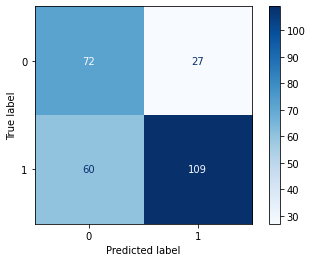

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_nus1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [53]:
test_scaled.groupby('target').count()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
target,,,,,,,,,,,,,,,,,,,
0.0,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
1.0,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169


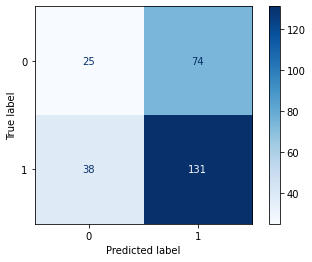

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Accuracy**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
print(knn.score(nus1_X_test, nus1_y_test))

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS!')
print(knn.score(nus1_X_test, nus1_y_test))

NUS1 Data
0.6567164179104478
Without NUS!
0.582089552238806


In [57]:
f1_score(nus1_y_test, y_pred_nus1, average='macro')

0.6690653608686397

In [58]:
f1_score(nus1_y_test, y_pred_nus1, average='micro')

0.6753731343283582

In [59]:
f1_score(nus1_y_test, y_pred_nus1, average='weighted')

0.6809989863329722

In [60]:
f1_score(nus1_y_test, y_pred_nus1, average=None)

array([0.62337662, 0.7147541 ])

# **Plot Results**

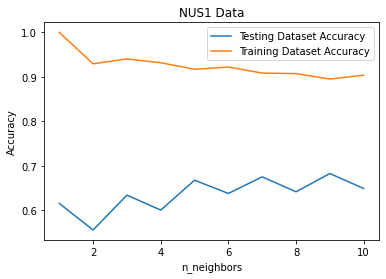

In [55]:
#NUS1 Data
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_X_train, nus1_y_train)
  
  train_accuracy[i] = knn.score(nus1_X_train, nus1_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('NUS1 Data')
plt.show()

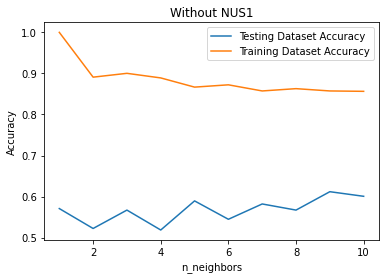

In [56]:
#Original Data (Without NUS1)
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_org_X_train, nus1_org_y_train)
  
  train_accuracy[i] = knn.score(nus1_org_X_train, nus1_org_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Without NUS1')
plt.show()